In [ ]:
Nurshanov Dias IT3-2208
lab 6 Spline of the first order
Computational Math

In [44]:
# Input values
import numpy as np


f = np.log

a, b = 1, 10
N = 10
k = 2

In [46]:
# a)Code implementation
x_i = np.linspace(a, b, N)
y_i = f(x_i)

x_hat = []
for i in range(len(x_i) - 1):
    x_hat.extend(np.linspace(x_i[i], x_i[i+1], k+2)[1:-1])  # Add intermediary points between nodes
x_hat = np.array(x_hat)

def calc_spline(x_hat, x_i, y_i):
    spline_values = []
    for x in x_hat:
        for i in range(len(x_i) - 1):
            if x_i[i] <= x <= x_i[i+1]:
                # Linear interpolation
                s_x = (y_i[i+1] - y_i[i]) / (x_i[i+1] - x_i[i]) * (x - x_i[i]) + y_i[i]
                spline_values.append(s_x)
                break
    return np.array(spline_values)

spline_values = calc_spline(x_hat, x_i, y_i)

f_values_hat = f(x_hat)

delta = np.abs(f_values_hat - spline_values)

In [47]:
# b)Output should be a table with results
import pandas as pd

df = pd.DataFrame({
    'x': x_hat,
    'f(x)': f_values_hat,
    's(x)': spline_values,
    'delta |f(x) - s(x)|': delta
})
df

,x,f(x),s(x),delta |f(x) - s(x)|
0,1.125,0.117783,0.106151,0.011632
1,1.250,0.223144,0.212302,0.010841
2,1.500,0.405465,0.398841,0.006624
3,1.625,0.485508,0.479228,0.006279
4,1.875,0.628609,0.624334,0.004274
5,2.000,0.693147,0.689053,0.004094
6,2.250,0.810930,0.807945,0.002985
7,2.375,0.864997,0.862118,0.002880
8,2.625,0.965081,0.962878,0.002203
9,2.750,1.011601,1.009465,0.002136


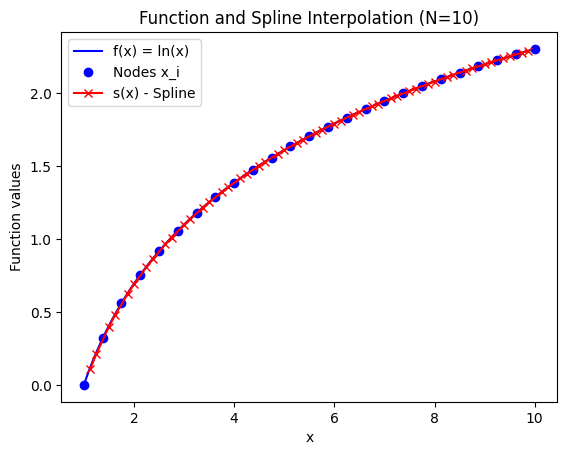

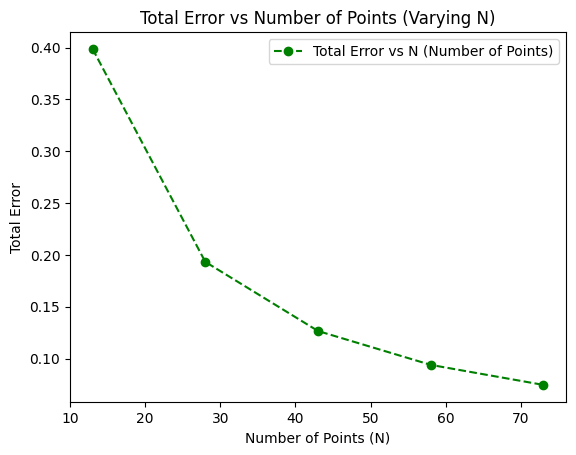

In [48]:
# c) 2 graphs: Distribution of values by two functions and the dependence of delta based on the number of points.
import matplotlib.pyplot as plt

#first graph
x_graph = np.linspace(1, 10, 100)
y_graph = f(x_graph)

plt.figure()
plt.plot(x_graph, y_graph, '-', label='f(x) = ln(x)', color='blue')
plt.plot(x_i, f(x_i), 'bo', label='Nodes x_i')  # Highlight nodes
plt.plot(x_hat, spline_values, 'rx-', label='s(x) - Spline')
plt.title('Function and Spline Interpolation (N=10)')
plt.xlabel('x')
plt.ylabel('Function values')
plt.legend()
plt.show()


#second graph
N_values = [5, 10, 15, 20, 25]

total_errors = []
total_points = []

for N in N_values:
    x_i = np.linspace(a, b, N)
    y_i = f(x_i)

    x_hat = []
    for i in range(len(x_i) - 1):
        x_hat.extend(np.linspace(x_i[i], x_i[i+1], k+2)[1:-1])  # Add intermediary points between nodes
    x_hat = np.array(x_hat)

    spline_values = calc_spline(x_hat, x_i, y_i)

    f_values_hat = f(x_hat)

    delta = np.abs(f_values_hat - spline_values)

    total_error = np.sum(delta)
    total_errors.append(total_error)

    total_points.append(len(x_i) + len(x_hat))

plt.figure()
plt.plot(total_points, total_errors, 'g--o', label='Total Error vs N (Number of Points)')
plt.title('Total Error vs Number of Points (Varying N)')
plt.xlabel('Number of Points (N)')
plt.ylabel('Total Error')
plt.legend()
plt.show()